# **House Loan Data Analysis**




**DESCRIPTION**

For safe and secure lending experience, it's important to analyze the past data. In this project, you have to build a deep learning model to predict the chance of default for future loans using the historical data. As you will see, this dataset is highly imbalanced and includes a lot of features that make this problem more challenging.


**Objective:** Create a model that predicts whether or not an applicant will be able to repay a loan using historical data.


**Domain:** Finance


**Analysis to be done:** Perform data preprocessing and build a deep learning prediction model.


**Steps to be done:**


⦁    Load the dataset that is given to you

⦁    Check for null values in the dataset

⦁    Print percentage of default to payer of the dataset for the TARGET column

⦁    Balance the dataset if the data is imbalanced

⦁    Plot the balanced data or imbalanced data

⦁    Encode the columns that is required for the model

⦁    Calculate Sensitivity as a metrice

⦁    Calculate area under receiver operating characteristics curve

In [16]:
# importing libraries
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf

In [3]:
# loading the dataset
data = pd.read_csv('loan_data.csv')
data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [7]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [6]:
# Checking for null values in the dataset
data.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [8]:
# Print percentage of default to payer of the dataset for the TARGET column
defaulters = (data.TARGET==1).sum()
payers = (data.TARGET==0).sum()
print ((defaulters/payers)*100)

8.781828601345662


<AxesSubplot:ylabel='TARGET'>

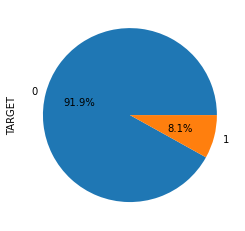

In [13]:
data.TARGET.value_counts().plot(kind='pie',autopct= '%1.1f%%')

<AxesSubplot:ylabel='TARGET'>

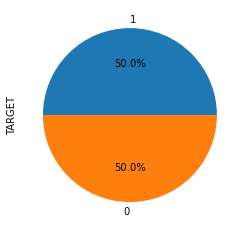

In [15]:
# Balance the dataset if the data is imbalanced
# Plot the balanced data or imbalanced data

shuffled_data=data.sample(frac=1,random_state=3)
unpaid_home_loan=shuffled_data.loc[shuffled_data['TARGET']==1] 
paid_home_loan=shuffled_data.loc[shuffled_data['TARGET']==0].sample(n=24825,random_state=1)
normalised_data=pd.concat([unpaid_home_loan,paid_home_loan])
normalised_data.TARGET.value_counts().plot(kind='pie',autopct="%1.1f%%")

In [17]:
normalised_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
207339,340318,1,Cash loans,F,N,N,0,112500.0,405000.0,21969.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
8756,110186,1,Cash loans,M,Y,N,0,135000.0,544491.0,17563.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
230344,366811,1,Cash loans,F,N,Y,0,112500.0,225000.0,17905.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
178329,306645,1,Cash loans,M,Y,Y,0,157500.0,595273.5,29083.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
55586,164407,1,Cash loans,M,N,N,0,157500.0,521451.0,35406.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


In [18]:
normalised_data.dropna(axis=0)
normalised_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49650 entries, 207339 to 99608
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 46.6+ MB


In [21]:
normalised_data.isnull().sum()

SK_ID_CURR                       0
TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     7497
AMT_REQ_CREDIT_BUREAU_WEEK    7497
AMT_REQ_CREDIT_BUREAU_MON     7497
AMT_REQ_CREDIT_BUREAU_QRT     7497
AMT_REQ_CREDIT_BUREAU_YEAR    7497
Length: 122, dtype: int64

In [28]:
(normalised_data[normalised_data['AMT_INCOME_TOTAL']>1000000]
 ['TARGET'].value_counts())/len(normalised_data[normalised_data['AMT_INCOME_TOTAL'] > 1000000])*100

0    60.606061
1    39.393939
Name: TARGET, dtype: float64

In [29]:
# as number of children is increasing lone defaulters are increasing

print((normalised_data[normalised_data['CNT_CHILDREN']>2]
       ['TARGET'].value_counts())/len(normalised_data[normalised_data['CNT_CHILDREN'] > 2])*100)

print((normalised_data[normalised_data['CNT_CHILDREN']>5]
       ['TARGET'].value_counts())/len(normalised_data[normalised_data['CNT_CHILDREN'] > 5])*100)

1    54.859335
0    45.140665
Name: TARGET, dtype: float64
1    69.230769
0    30.769231
Name: TARGET, dtype: float64


In [30]:
# people with own cars are slighlty more likely to repay back the loan

print((normalised_data[normalised_data['FLAG_OWN_CAR']=='N']
       ['TARGET'].value_counts())/len(normalised_data[normalised_data['FLAG_OWN_CAR'] =='N'])*100)

print((normalised_data[normalised_data['FLAG_OWN_CAR']=='Y']
       ['TARGET'].value_counts())/len(normalised_data[normalised_data['FLAG_OWN_CAR'] =='Y'])*100) 

1    51.477259
0    48.522741
Name: TARGET, dtype: float64
0    53.066535
1    46.933465
Name: TARGET, dtype: float64


In [31]:
normalised_data=normalised_data.sample(frac=1,random_state=5)

In [32]:
from sklearn.preprocessing import OrdinalEncoder

ordenc=OrdinalEncoder()
normalised_data['NAME_CONTRACT_TYPE_CODE']=ordenc.fit_transform(normalised_data[['NAME_CONTRACT_TYPE']]) 
print(normalised_data[['NAME_CONTRACT_TYPE','NAME_CONTRACT_TYPE_CODE']].head(20))
print(normalised_data['NAME_CONTRACT_TYPE_CODE'].value_counts())

       NAME_CONTRACT_TYPE  NAME_CONTRACT_TYPE_CODE
302218         Cash loans                      0.0
38516          Cash loans                      0.0
159305         Cash loans                      0.0
275427         Cash loans                      0.0
274608         Cash loans                      0.0
192094         Cash loans                      0.0
235115    Revolving loans                      1.0
79051          Cash loans                      0.0
196238    Revolving loans                      1.0
200124         Cash loans                      0.0
128624         Cash loans                      0.0
22395          Cash loans                      0.0
124911         Cash loans                      0.0
288269         Cash loans                      0.0
116978         Cash loans                      0.0
170509         Cash loans                      0.0
118237         Cash loans                      0.0
80760          Cash loans                      0.0
114092         Cash loans      

In [36]:
normalised_data['CODE_GENDER_CODE']=ordenc.fit_transform(normalised_data[['CODE_GENDER']]) 
print(normalised_data[['CODE_GENDER','CODE_GENDER_CODE']].head(20))
print(normalised_data['CODE_GENDER_CODE'].value_counts())

       CODE_GENDER  CODE_GENDER_CODE
302218           M               1.0
38516            M               1.0
159305           M               1.0
275427           F               0.0
274608           M               1.0
192094           M               1.0
235115           F               0.0
79051            F               0.0
196238           M               1.0
200124           F               0.0
128624           M               1.0
22395            F               0.0
124911           M               1.0
288269           F               0.0
116978           F               0.0
170509           F               0.0
118237           F               0.0
80760            F               0.0
114092           F               0.0
249976           F               0.0
0.0    30649
1.0    19001
Name: CODE_GENDER_CODE, dtype: int64


In [37]:
normalised_data.loc[normalised_data['CODE_GENDER_CODE']==2]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_CODE,CODE_GENDER_CODE


In [38]:
normalised_data['FLAG_OWN_CAR_CODE']=ordenc.fit_transform(normalised_data[['FLAG_OWN_CAR']]) 
print(normalised_data[['FLAG_OWN_CAR','FLAG_OWN_CAR_CODE']].head(20))
print(normalised_data['FLAG_OWN_CAR_CODE'].value_counts())

       FLAG_OWN_CAR  FLAG_OWN_CAR_CODE
302218            N                0.0
38516             N                0.0
159305            N                0.0
275427            N                0.0
274608            Y                1.0
192094            N                0.0
235115            N                0.0
79051             N                0.0
196238            N                0.0
200124            N                0.0
128624            N                0.0
22395             N                0.0
124911            N                0.0
288269            Y                1.0
116978            Y                1.0
170509            N                0.0
118237            N                0.0
80760             N                0.0
114092            N                0.0
249976            N                0.0
0.0    33508
1.0    16142
Name: FLAG_OWN_CAR_CODE, dtype: int64


In [50]:
normalised_data['CNT_CHILDREN_CODE']=ordenc.fit_transform(normalised_data[['CNT_CHILDREN']]) 
print(normalised_data[['CNT_CHILDREN_CODE','CNT_CHILDREN']].head(20))
print(normalised_data['CNT_CHILDREN_CODE'].value_counts())

        CNT_CHILDREN_CODE  CNT_CHILDREN
302218                0.0             0
38516                 0.0             0
159305                2.0             2
275427                0.0             0
274608                1.0             1
192094                0.0             0
235115                0.0             0
79051                 0.0             0
196238                0.0             0
200124                2.0             2
128624                0.0             0
22395                 0.0             0
124911                0.0             0
288269                0.0             0
116978                0.0             0
170509                2.0             2
118237                2.0             2
80760                 0.0             0
114092                0.0             0
249976                0.0             0
0.0     33950
1.0     10411
2.0      4507
3.0       661
4.0        92
5.0        16
6.0         8
7.0         2
8.0         1
10.0        1
9.0         1
Name: 

In [54]:
normalised_data=normalised_data.sample(frac=1,random_state=45)

In [55]:
normalised_data['TARGET'].value_counts()

0    24825
1    24825
Name: TARGET, dtype: int64

In [56]:
y=normalised_data.TARGET
normalised_data_features=['SK_ID_CURR','NAME_CONTRACT_TYPE_CODE','CNT_CHILDREN_CODE','FLAG_OWN_CAR_CODE','CODE_GENDER_CODE']

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X=normalised_data[normalised_data_features] 

In [63]:
from sklearn.datasets import make_blobs

blobs_random_seed = 42
centers = [(0,0), (5,5)]
cluster_std = 1
frac_test_split = 0.33
num_features_for_samples = 2
num_samples_total = 49650

In [66]:
inputs, targets = make_blobs(n_samples = num_samples_total, centers = centers, n_features = 
                             num_features_for_samples, cluster_std = cluster_std)


X_train,X_test,y_train,y_test=train_test_split(inputs,targets,test_size=0.33,random_state=45)

In [67]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(33265, 2) (16385, 2) (33265,) (16385,)


In [72]:
import matplotlib.pyplot as plt



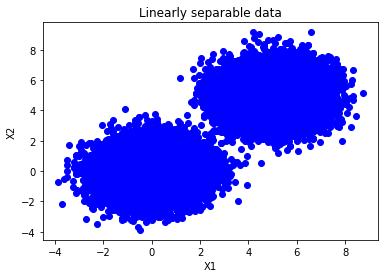

In [124]:
plt.scatter(X_train[:,0], X_train[:,1],color='blue')
plt.title('Linearly separable data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [91]:
from sklearn import svm 
from sklearn.metrics import ConfusionMatrixDisplay

In [92]:
clf=svm.SVC(kernel='linear')


In [93]:
clf=clf.fit(X_train,y_train)

In [94]:
predictions = clf.predict(X_test)

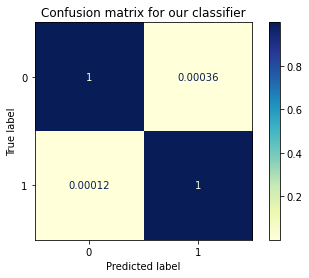

In [127]:
import warnings
warnings.filterwarnings('ignore')


matrix = plot_confusion_matrix(clf, X_test, y_test,
                                 cmap=plt.cm.YlGnBu,
                                 normalize='true')
plt.title('Confusion matrix for our classifier')
plt.show(matrix)
plt.show()

In [81]:
from sklearn.metrics import precision_score, recall_score,f1_score

In [82]:
print(precision_score(y_test, predictions))
print(recall_score(y_test, predictions)) 
print(f1_score(y_test,predictions,average=None))

0.9996309963099631
0.999876968503937
[0.99975775 0.99975397]


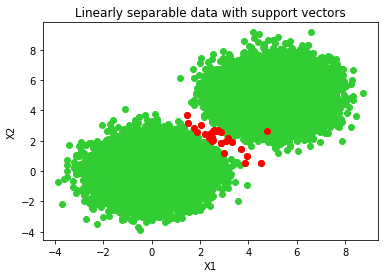

In [112]:
support_vectors = clf.support_vectors_

# Visualize support vectors
plt.scatter(X_train[:,0], X_train[:,1],color= 'limegreen')
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
plt.title('Linearly separable data with support vectors')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [85]:
from mlxtend.plotting import plot_decision_regions

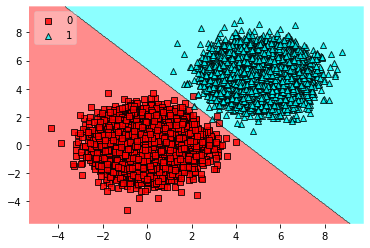

In [115]:
plot_decision_regions(X_test, y_test, clf=clf, legend=2,colors='red,cyan')
plt.show()